In [1]:
# This code for figure 10 - SST, SSS, MLD2 
# edited by EunByeol Cho 
# July 4 2024
# this code based on scaling_fig9.ipynb

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
#import pystuff as ps
import cartopy.crs as ccrs
import cartopy.feature as cf
import seaborn as sns
import matplotlib.patches as patches
from scipy import stats
import cmocean
import glob
from cmcrameri import cm
from tqdm.notebook import tqdm_notebook

In [3]:
import warnings
warnings.simplefilter(action='ignore')

In [6]:
# load variables at each periods 
mld2_scaling = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure10/mld2_scaling.nc')['mld2_scaling']
sst_scaling = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure10/sst_scaling.nc')['sst_scaling']
sss_scaling = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure10/sss_scaling.nc')['sss_scaling']

mld2_2000 = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure10/MLD2.fesom.2002_2012.nc')['MLD2']
sst_2000 = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure10/temp1-31.fesom.2002_2012.nc')['temp1-31']
sss_2000 = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure10/sss.fesom.2002_2012.nc')['sss']

In [7]:
mld2_2000 = -mld2_2000.squeeze()
sst_2000 = sst_2000.squeeze()
sss_2000 = sss_2000.squeeze()

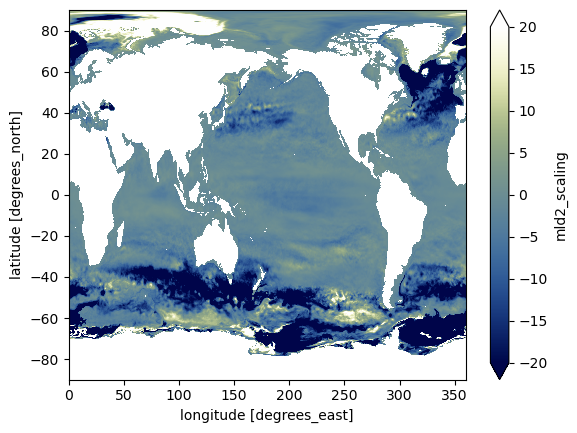

In [8]:
#mld2_scaling.plot(cmap=cm.davos,vmax=20,vmin=-20)

  0%|          | 0/6 [00:00<?, ?it/s]

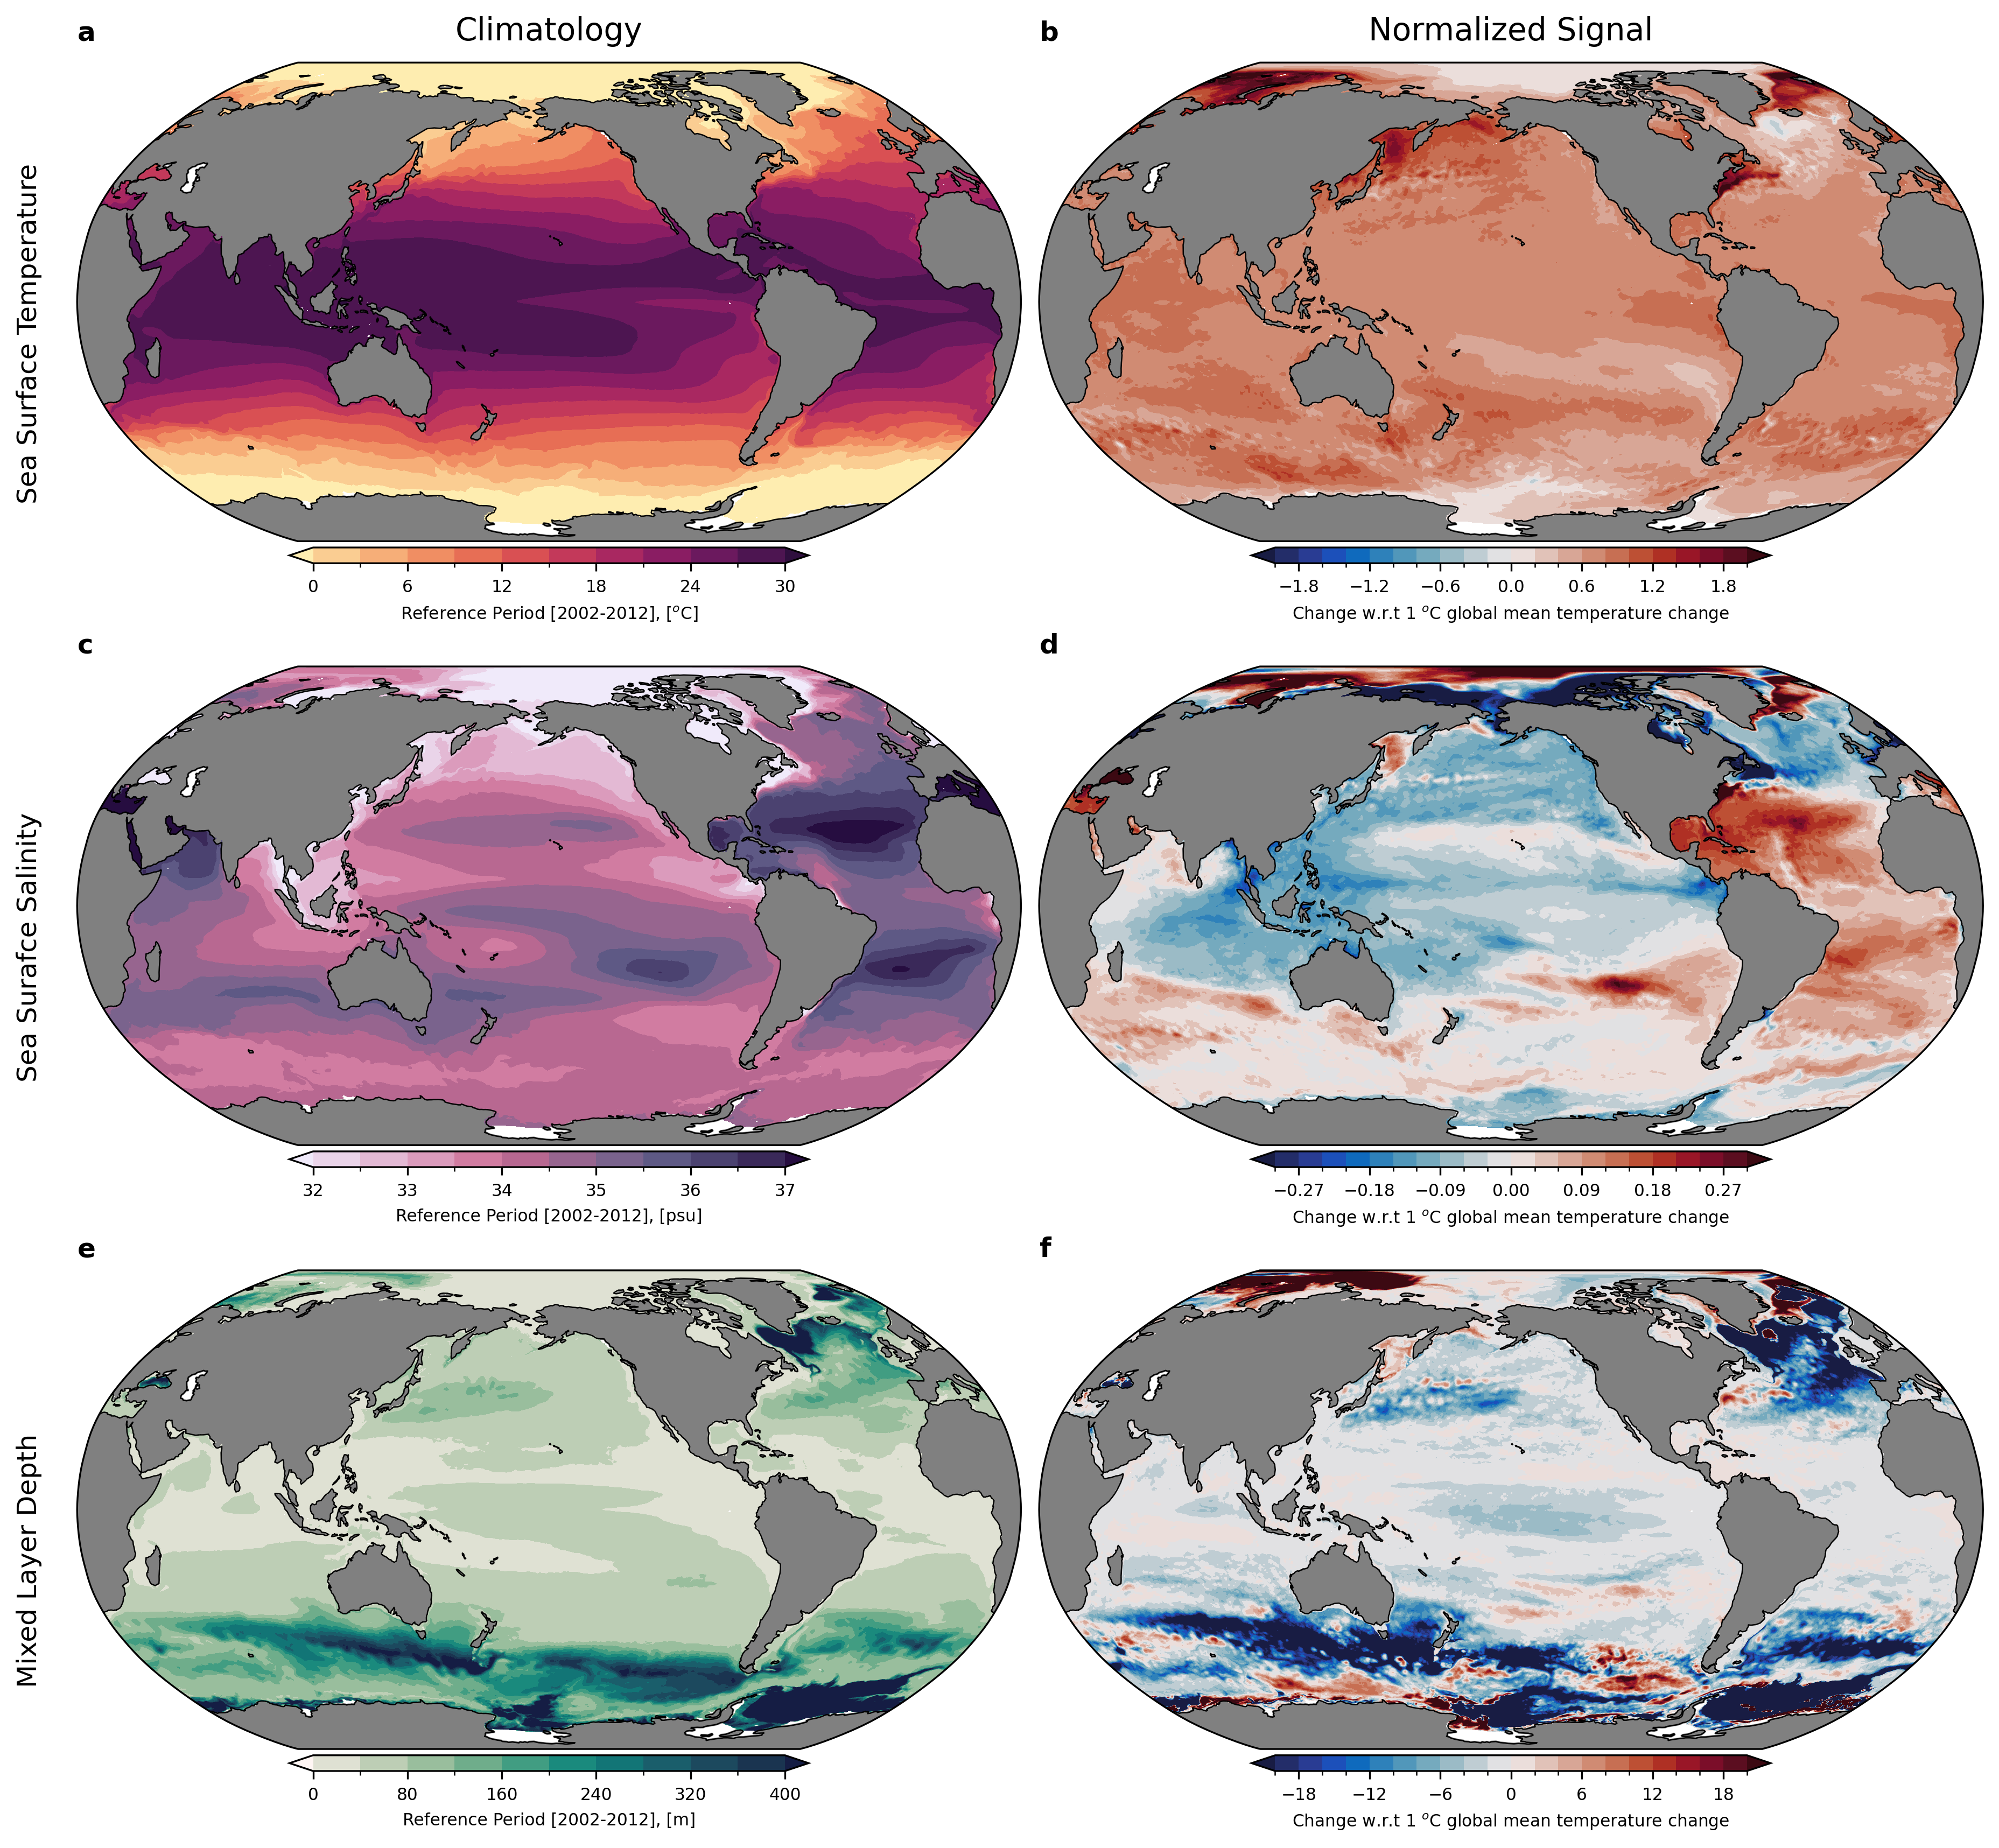

In [10]:
plt.rcParams.update({'font.size': 7.5})
fig,ax = plt.subplots(3,2,figsize=(18.5, 19), dpi=300, facecolor='w', edgecolor='k',subplot_kw={'projection': ccrs.Robinson(central_longitude=200)})

import cmocean

titlesM = ['Climatology', 'Normalized Signal']
titlesL = ['$\mathbf{a}$', '$\mathbf{b}$', '$\mathbf{c}$', '$\mathbf{d}$', '$\mathbf{e}$', '$\mathbf{f}$']
labels = ['Sea Surface Temperature', 'Sea Surafce Salinity', 'Mixed Layer Depth']

fields=[sst_2000, sst_scaling,
        sss_2000, sss_scaling,
        mld2_2000, mld2_scaling]

levels=[np.arange(0,33,3), np.arange(-2,2.2,0.2),
        np.arange(32,37.5,0.5), np.arange(-0.3,0.33,0.03),
        np.arange(0,440,40), np.arange(-20,22,2)]

cbar=[cmocean.cm.matter, cmocean.cm.balance,
      cm.acton_r, cmocean.cm.balance,
      cmocean.cm.tempo, cmocean.cm.balance]

units=[ 'Reference Period [2002-2012], [$^{o}$C]', 'Change w.r.t 1 $^{o}$C global mean temperature change',
        'Reference Period [2002-2012], [psu]', 'Change w.r.t 1 $^{o}$C global mean temperature change', 
        'Reference Period [2002-2012], [m]', 'Change w.r.t 1 $^{o}$C global mean temperature change']

for i,a in enumerate(tqdm_notebook(ax.flat)) :
      clabel=('%s'%units[i])
      cbar_kwargs={'orientation':'horizontal','pad':0.01,'shrink':0.55, 'label':clabel, 'aspect':33}
      fields[i].plot.contourf(ax=a,transform=ccrs.PlateCarree(),levels=levels[i],cbar_kwargs=cbar_kwargs,cmap=cbar[i], extend='both')

      a.add_feature(cf.LAND,color='grey')
      a.coastlines(linewidth=0.6,color='black')
      a.set_global()  

for i, label in enumerate(labels):
    fig.text(0.29, 0.86 - i * 0.20, label, transform=fig.transFigure, fontsize=12, va='center', ha='center', rotation=90)
        
for i, a in enumerate(ax.flat):
    a.set_title('%s' % titlesL[i], size=12, loc='left')

    if i <= 1:
        a.set_title('%s' % (titlesM[i]), size=14, y=1.0, pad=10)
    else:
        a.set_title('')
            
plt.tight_layout(rect=[0.3, 0.36, 0.95, 0.97])
plt.savefig('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure10/Figure10.png',dpi=500, bbox_inches = 'tight')